<a href="https://colab.research.google.com/github/BlackBoyZeus/computervision-S-/blob/main/dataprocessair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/airplane/air.zip -d /content/drive/MyDrive/unet


Archive:  /content/drive/MyDrive/airplane/air.zip
   creating: /content/drive/MyDrive/unet/masks/
  inflating: /content/drive/MyDrive/unet/masks/ag_2400_0_jpg.rf.49cce0e04dcb27a93c3f0ba053b607ed.jpg  
  inflating: /content/drive/MyDrive/unet/masks/ag_2400_0_jpg.rf.8abb7796498d0450a801f1ad07885c85.jpg  
  inflating: /content/drive/MyDrive/unet/masks/ag_2400_0_jpg.rf.f7db6abb783442875cea3219c98e49a2.jpg  
  inflating: /content/drive/MyDrive/unet/masks/ag_800_0_jpg.rf.73fe503ca46e9a586396030fdc6b254d.jpg  
  inflating: /content/drive/MyDrive/unet/masks/ag_800_0_jpg.rf.bd1fdbc31e0d7beb3fc17effa712a638.jpg  
  inflating: /content/drive/MyDrive/unet/masks/ag_800_0_jpg.rf.c6d4dd52e0839841434bb426fda515fc.jpg  
  inflating: /content/drive/MyDrive/unet/masks/beni_2400_800_jpg.rf.152e271e0d05ab5dcfb2a338b3478784.jpg  
  inflating: /content/drive/MyDrive/unet/masks/beni_2400_800_jpg.rf.ee432b6c1f54a0779851ca0cd2da0969.jpg  
  inflating: /content/drive/MyDrive/unet/masks/beni_2400_800_jpg.rf.fdc7e

In [ ]:
def split_dataset(images, masks, split=0.2):
    split_size = int(len(images) * split)

    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=1)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=1)

    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=1)
    train_y, test_y = train_test_split(train_y, test_size=split_size, random_state=1)

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

In [ ]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
def save_dataset(images, masks, save_dir):
    for x, y in tqdm(zip(images, masks), total=len(images)):
        name = x.split("/")[-1]

        x = cv2.imread(x, cv2.IMREAD_COLOR)
        y = cv2.imread(y, cv2.IMREAD_COLOR)

        save_image_path = os.path.join(save_dir, "images", name)
        save_mask_path = os.path.join(save_dir, "masks", name)

        cv2.imwrite(save_image_path, x)
        cv2.imwrite(save_mask_path, y)

In [ ]:
dataset_path = "/content/drive/MyDrive/unet"

In [ ]:
def load_dataset(path):
  images = sorted(glob(os.path.join(path, "images", "*")))
  masks = sorted(glob(os.path.join(path, "masks", "*")))
  return images, masks

In [ ]:
images, masks = load_dataset(dataset_path)
print(f"Images: {len(images)} - Masks: {len(masks)}")

Images: 297 - Masks: 297


In [ ]:
for x, y in zip(images, masks):
    print(x, y)

/content/drive/MyDrive/unet/images/ag_2400_0_jpg.rf.49cce0e04dcb27a93c3f0ba053b607ed.jpg /content/drive/MyDrive/unet/masks/ag_2400_0_jpg.rf.49cce0e04dcb27a93c3f0ba053b607ed.jpg
/content/drive/MyDrive/unet/images/ag_2400_0_jpg.rf.8abb7796498d0450a801f1ad07885c85.jpg /content/drive/MyDrive/unet/masks/ag_2400_0_jpg.rf.8abb7796498d0450a801f1ad07885c85.jpg
/content/drive/MyDrive/unet/images/ag_2400_0_jpg.rf.f7db6abb783442875cea3219c98e49a2.jpg /content/drive/MyDrive/unet/masks/ag_2400_0_jpg.rf.f7db6abb783442875cea3219c98e49a2.jpg
/content/drive/MyDrive/unet/images/ag_800_0_jpg.rf.73fe503ca46e9a586396030fdc6b254d.jpg /content/drive/MyDrive/unet/masks/ag_800_0_jpg.rf.73fe503ca46e9a586396030fdc6b254d.jpg
/content/drive/MyDrive/unet/images/ag_800_0_jpg.rf.bd1fdbc31e0d7beb3fc17effa712a638.jpg /content/drive/MyDrive/unet/masks/ag_800_0_jpg.rf.bd1fdbc31e0d7beb3fc17effa712a638.jpg
/content/drive/MyDrive/unet/images/ag_800_0_jpg.rf.c6d4dd52e0839841434bb426fda515fc.jpg /content/drive/MyDrive/unet/mas

In [ ]:
!pip install imshowtools


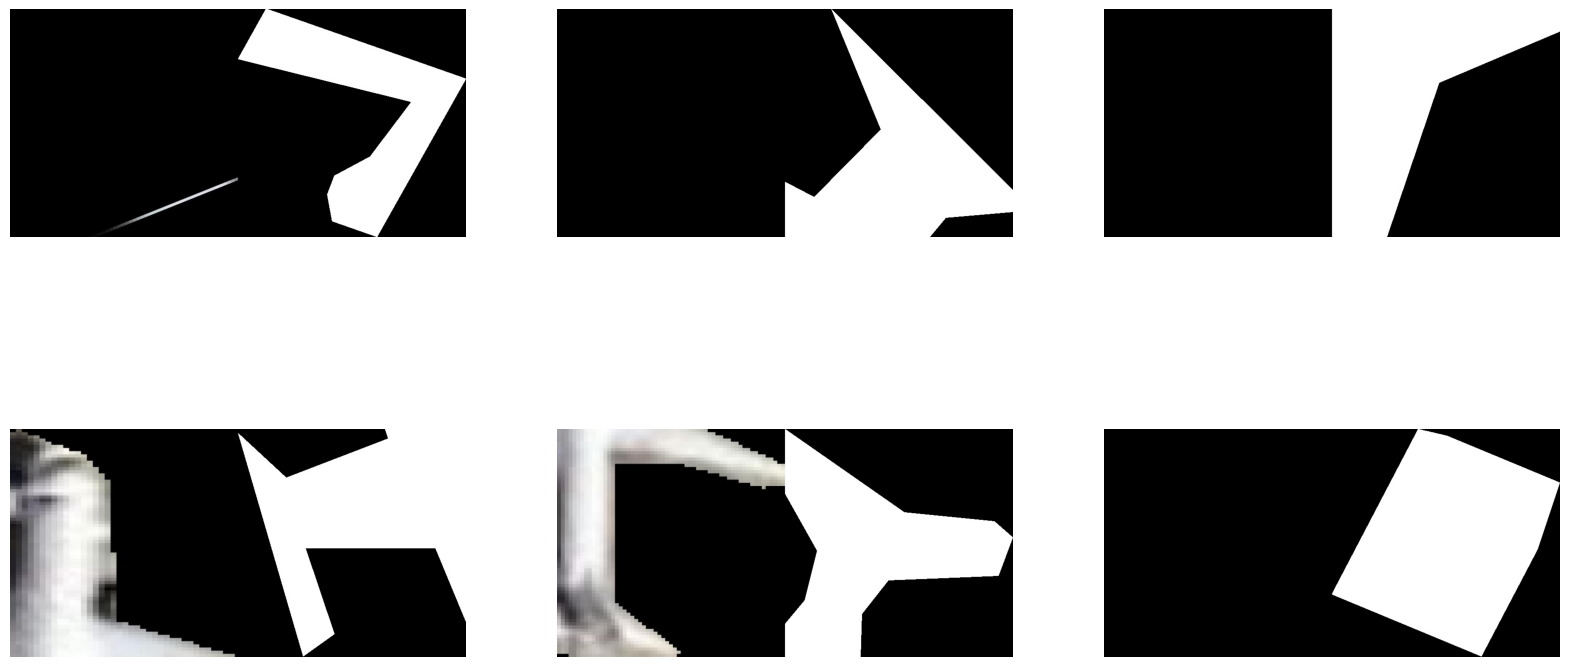

In [ ]:
from imshowtools import imshow

cat = []
for x, y in zip(images[:6], masks[:6]):
    x = cv2.imread(x, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    y = cv2.imread(y, cv2.IMREAD_COLOR)
    z = np.concatenate([x, y], axis=1)
    cat.append(z)

imshow(*cat, size=(20, 10), columns=3)

In [ ]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = split_dataset(images, masks, split=0.2)

In [ ]:
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")
print(f"Test : {len(test_x)} - {len(test_y)}")

Train: 179 - 179
Valid: 59 - 59
Test : 59 - 59


In [ ]:
save_dir = os.path.join("/content/drive/MyDrive/unet", "non-aug")
for item in ["train", "valid", "test"]:
    create_dir(os.path.join(save_dir, item, "images"))
    create_dir(os.path.join(save_dir, item, "masks"))

In [ ]:
!ls

drive  sample_data


In [ ]:
save_dataset(train_x, train_y, os.path.join(save_dir, "train"))

100%|██████████| 179/179 [00:06<00:00, 26.32it/s]


In [ ]:
save_dataset(valid_x, valid_y, os.path.join(save_dir, "valid"))

100%|██████████| 59/59 [00:02<00:00, 23.39it/s]


In [ ]:
save_dataset(test_x, test_y, os.path.join(save_dir, "test"))

100%|██████████| 59/59 [00:01<00:00, 35.71it/s]


In [ ]:
!mv "/content/unet/non-aug" "/content/drive/MyDrive/unet"


In [ ]:
!ls

 air.zip   images   masks   non-aug  'non-aug (1)'


In [ ]:
#Training

In [ ]:
drive_path =  "/content/drive/MyDrive"

In [ ]:
!pip3 install numpy

In [ ]:
import os
import numpy as np
import cv2
from glob import glob
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

In [ ]:
os.environ["PYTHONHASHSEED"] = str(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
batch_size = 4
lr = 1e-4 ## 0.0001
epochs = 5
height = 512
width = 512

In [ ]:
dataset_path = os.path.join('/content/drive/MyDrive/unet/non-aug')

files_dir = os.path.join(drive_path, "UnetAirplane", "files", "non-aug")
model_file = os.path.join(files_dir, "unet-non-aug.h5")
log_file = os.path.join(files_dir, "log-non-aug.csv")

In [ ]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
create_dir(files_dir)

In [ ]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

In [ ]:
def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

In [ ]:
def decoder_block(inputs, skip, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip])
    x = conv_block(x, num_filters)
    return x

In [ ]:
def build_unet(input_shape):
    inputs = Input(input_shape)

    """ Encoder """
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    """ Bridge """
    b1 = conv_block(p4, 1024)

    """ Decoder """
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model

In [ ]:
def load_data(path):
    train_x = sorted(glob(os.path.join(path, "train", "images", "*")))
    train_y = sorted(glob(os.path.join(path, "train", "masks", "*")))

    valid_x = sorted(glob(os.path.join(path, "valid", "images", "*")))
    valid_y = sorted(glob(os.path.join(path, "valid", "masks", "*")))

    return (train_x, train_y), (valid_x, valid_y)

In [ ]:
def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = x/255.0
    return x

In [ ]:
def read_mask(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = x/255.0
    x = np.expand_dims(x, axis=-1)
    return x

In [ ]:
def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float64, tf.float64])
    x.set_shape([height, width, 3])
    y.set_shape([height, width, 1])

    return x, y

In [ ]:
def tf_dataset(x, y, batch=8):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.map(tf_parse, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

In [ ]:
(train_x, train_y), (valid_x, valid_y) = load_data(dataset_path)
print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Valid: {len(valid_x)} - {len(valid_y)}")

Train: 179 - 179
Valid: 59 - 59


In [ ]:
train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)

In [ ]:
for x, y in valid_dataset:
    print(x.shape, y.shape)

(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(4, 512, 512, 3) (4, 512, 512, 1)
(3, 512, 512, 3) (3, 512, 512, 1)


In [ ]:
input_shape = (height, width, 3)
model = build_unet(input_shape)

In [ ]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 512, 512, 64  1792        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 512, 512, 64  256        ['conv2d_57[0][0]']              
 ormalization)                  )                                                              

In [ ]:
opt = tf.keras.optimizers.Adam(lr)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["acc"])

In [ ]:
callbacks = [
        ModelCheckpoint(model_file, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
        CSVLogger(log_file),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=False)
    ]

In [ ]:
model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/5
45/45 [==============================] - ETA: 0s - loss: 0.4743 - acc: 0.8581
Epoch 1: val_loss improved from inf to 0.59479, saving model to /content/drive/MyDrive/UnetAirplane/files/non-aug/unet-non-aug.h5
45/45 [==============================] - 70s 1s/step - loss: 0.4743 - acc: 0.8581 - val_loss: 0.5948 - val_acc: 0.9785 - lr: 1.0000e-04
Epoch 2/5
45/45 [==============================] - ETA: 0s - loss: 0.2184 - acc: 0.9803
Epoch 2: val_loss improved from 0.59479 to 0.43576, saving model to /content/drive/MyDrive/UnetAirplane/files/non-aug/unet-non-aug.h5
45/45 [==============================] - 75s 2s/step - loss: 0.2184 - acc: 0.9803 - val_loss: 0.4358 - val_acc: 0.9788 - lr: 1.0000e-04
Epoch 3/5
45/45 [==============================] - ETA: 0s - loss: 0.1751 - acc: 0.9811
Epoch 3: val_loss improved from 0.43576 to 0.33148, saving model to /content/drive/MyDrive/UnetAirplane/files/non-aug/unet-non-aug.h5
45/45 [==============================] - 76s 2s/step - loss: 0.175

In [ ]:
#Evaluation

In [ ]:
import os
import time
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
import tensorflow as tf

In [ ]:
os.environ["PYTHONHASHSEED"] = str(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
height = 256
width = 256

In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/UnetAirplane

/content/drive/MyDrive/UnetAirplane


In [ ]:
!ls

files  pred  predict


In [ ]:
dataset_path= "/content/drive/MyDrive/unet/non-aug"
save_path = "/content/drive/MyDrive/UnetAirplane/predict"
model_path = '/content/drive/MyDrive/UnetAirplane/files/non-aug/unet-non-aug.h5'

In [ ]:
save_path ='/content/drive/MyDrive/airplane/predout'

In [ ]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
create_dir(save_path)



In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/UnetAirplane/files/non-aug/unet-non-aug.h5')

In [ ]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 512, 512, 64  1792        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 512, 512, 64  256        ['conv2d_57[0][0]']              
 ormalization)                  )                                                              

In [ ]:
test_x = sorted(glob(os.path.join('/content/drive/MyDrive/unet/non-aug/test', "images", "*")))
print("Test Images: ", len(test_x))

Test Images:  59


In [ ]:
time_taken = []

for x in tqdm(test_x):
    name = x.split("/")[-1]

    x = cv2.imread(x, cv2.IMREAD_COLOR)
    x = x/255.0
    x = np.expand_dims(x, axis=0)

    start_time = time.time()
    p = model.predict(x)[0]
    total_time = time.time() - start_time

    time_taken.append(total_time)

    p = p > 0.5
    p = p * 255.0

    cv2.imwrite(os.path.join(save_path, name), p)

  0%|          | 0/59 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 1/59 [00:00<00:15,  3.71it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 2/59 [00:00<00:14,  3.98it/s]

1/1 [==============================] - 0s 94ms/step


  5%|▌         | 3/59 [00:00<00:16,  3.47it/s]

1/1 [==============================] - 0s 74ms/step


  7%|▋         | 4/59 [00:01<00:15,  3.50it/s]

1/1 [==============================] - 0s 70ms/step


  8%|▊         | 5/59 [00:01<00:16,  3.23it/s]

1/1 [==============================] - 0s 33ms/step


 10%|█         | 6/59 [00:01<00:14,  3.60it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 7/59 [00:01<00:13,  3.77it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▎        | 8/59 [00:02<00:13,  3.89it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 9/59 [00:02<00:12,  4.01it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 10/59 [00:02<00:12,  4.02it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▊        | 11/59 [00:02<00:11,  4.05it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 12/59 [00:03<00:11,  4.10it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 13/59 [00:03<00:11,  4.12it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▎       | 14/59 [00:03<00:10,  4.17it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 15/59 [00:03<00:10,  4.39it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 16/59 [00:04<00:09,  4.36it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 17/59 [00:04<00:09,  4.31it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 18/59 [00:04<00:09,  4.29it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 19/59 [00:04<00:09,  4.24it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 20/59 [00:04<00:08,  4.44it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 21/59 [00:05<00:08,  4.32it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 22/59 [00:05<00:09,  3.97it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 23/59 [00:05<00:07,  4.55it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 24/59 [00:05<00:07,  4.95it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 25/59 [00:05<00:06,  5.35it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 26/59 [00:06<00:05,  5.77it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 27/59 [00:06<00:05,  6.09it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 28/59 [00:06<00:04,  6.31it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 29/59 [00:06<00:04,  6.52it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 30/59 [00:06<00:04,  6.75it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 31/59 [00:06<00:04,  6.01it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 32/59 [00:07<00:04,  6.22it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 33/59 [00:07<00:04,  6.38it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 34/59 [00:07<00:04,  5.75it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 35/59 [00:07<00:04,  5.87it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 36/59 [00:07<00:03,  5.99it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 37/59 [00:07<00:03,  6.27it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▍   | 38/59 [00:07<00:03,  6.51it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 39/59 [00:08<00:03,  5.85it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 40/59 [00:08<00:03,  6.13it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 41/59 [00:08<00:02,  6.36it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 42/59 [00:08<00:02,  6.34it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 43/59 [00:08<00:02,  5.78it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 44/59 [00:08<00:02,  6.09it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 45/59 [00:09<00:02,  5.57it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 46/59 [00:09<00:02,  5.86it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 47/59 [00:09<00:01,  6.06it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 48/59 [00:09<00:01,  5.55it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 49/59 [00:09<00:01,  5.29it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 50/59 [00:10<00:01,  5.04it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▋ | 51/59 [00:10<00:01,  5.39it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 52/59 [00:10<00:01,  5.73it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 53/59 [00:10<00:00,  6.00it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 54/59 [00:10<00:00,  6.17it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 55/59 [00:10<00:00,  5.58it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 56/59 [00:11<00:00,  5.89it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 57/59 [00:11<00:00,  6.09it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 58/59 [00:11<00:00,  6.21it/s]

1/1 [==============================] - 0s 24ms/step


100%|██████████| 59/59 [00:11<00:00,  5.09it/s]


AttributeError: ignored

In [ ]:
mean_time = np.mean(time_taken)
mean_fps = 1/mean_time

print(f"Mean Time: {mean_time: 1.5f} - Mean FPS: {mean_fps:2.5f}")

Mean Time:  0.18243 - Mean FPS: 5.48159


In [ ]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score

In [ ]:
print(pred_mask, true_mask)

['/content/drive/MyDrive/airplane/predout/ag_2400_0_jpg.rf.8abb7796498d0450a801f1ad07885c85.jpg', '/content/drive/MyDrive/airplane/predout/bens_3200_2400_jpg.rf.a9265161a014b14c5c0ede5f47b13b64.jpg', '/content/drive/MyDrive/airplane/predout/bens_3200_2400_jpg.rf.c1d8c75494173bbdb1e1212a3756838a.jpg', '/content/drive/MyDrive/airplane/predout/bens_4000_3200_jpg.rf.9dc34ccee7bb0a446b7f1722868aa127.jpg', '/content/drive/MyDrive/airplane/predout/bens_4000_3200_jpg.rf.a00e7edb2c992f01a5999edb1a43a6be.jpg', '/content/drive/MyDrive/airplane/predout/chunk_4000_1600_jpg.rf.762a19e16631d6ae22e1f84a5ac8cfe0.jpg', '/content/drive/MyDrive/airplane/predout/chunk_4000_1600_jpg.rf.d690974b15c712eea83a6b93f49f7e61.jpg', '/content/drive/MyDrive/airplane/predout/chunk_4000_2400_jpg.rf.fe6477b0dd6019c27b1f47bcb06e4fe9.jpg', '/content/drive/MyDrive/airplane/predout/chunk_4000_800_jpg.rf.df5fdd58ab54ec71e3ed724dab0726dd.jpg', '/content/drive/MyDrive/airplane/predout/chunk_5600_5600_jpg.rf.8e84555a08ab9c7c1ba

In [ ]:
pred_mask = sorted(glob(os.path.join("/content/drive/MyDrive/airplane/predout", "*")))
true_mask = sorted(glob(os.path.join("/content/drive/MyDrive/unet/non-aug/test", "/content/drive/MyDrive/unet/non-aug/test/masks", "*")))

In [ ]:
score = []

for pred_y, true_y in tqdm(zip(pred_mask, true_mask), total=len(pred_mask)):
    name = pred_y.split("/")[-1]

    pred_y = cv2.imread(pred_y, cv2.IMREAD_GRAYSCALE)
    pred_y = pred_y/255.0
    pred_y = pred_y > 0.5
    pred_y = pred_y.astype(np.int32)
    pred_y = pred_y.flatten()

    true_y = cv2.imread(true_y, cv2.IMREAD_GRAYSCALE)
    true_y = true_y/255.0
    true_y = true_y > 0.5
    true_y = true_y.astype(np.int32)
    true_y = true_y.flatten()

    acc_value = accuracy_score(pred_y, true_y)
    f1_value = f1_score(pred_y, true_y, labels=[0, 1], average="binary")
    jac_value = jaccard_score(pred_y, true_y, labels=[0, 1], average="binary")
    recall_value = recall_score(pred_y, true_y, labels=[0, 1], average="binary")
    precision_value = precision_score(pred_y, true_y, labels=[0, 1], average="binary")

    score.append([name, acc_value, f1_value, jac_value, recall_value, precision_value])

  0%|          | 0/59 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  2%|▏         | 1/59 [00:00<00:16,  3.57it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  3%|▎         | 2/59 [00:00<00:16,  3.49it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  5%|▌         | 3/59

In [ ]:
score = [s[1:] for s in score]

In [ ]:
mean_score = np.mean(score, axis=0)

In [ ]:
print(f"Accuracy: {mean_score[0]:0.5f}")
print(f"F1: {mean_score[1]:0.5f}")
print(f"Jaccard: {mean_score[2]:0.5f}")
print(f"Recall: {mean_score[3]:0.5f}")
print(f"Precision: {mean_score[4]:0.5f}")

Accuracy: 0.98070
F1: 0.00000
Jaccard: 0.00000
Recall: 0.00000
Precision: 0.00000


In [ ]:
test_x = sorted(glob(os.path.join("/content/drive/MyDrive/unet/non-aug/test/", "images", "*")))
test_y = sorted(glob(os.path.join("/content/drive/MyDrive/unet/non-aug/test/", "masks", "*")))

In [ ]:
print(test_x, test_y)

['/content/drive/MyDrive/unet/non-aug/test/images/ag_2400_0_jpg.rf.8abb7796498d0450a801f1ad07885c85.jpg', '/content/drive/MyDrive/unet/non-aug/test/images/bens_3200_2400_jpg.rf.a9265161a014b14c5c0ede5f47b13b64.jpg', '/content/drive/MyDrive/unet/non-aug/test/images/bens_3200_2400_jpg.rf.c1d8c75494173bbdb1e1212a3756838a.jpg', '/content/drive/MyDrive/unet/non-aug/test/images/bens_4000_3200_jpg.rf.9dc34ccee7bb0a446b7f1722868aa127.jpg', '/content/drive/MyDrive/unet/non-aug/test/images/bens_4000_3200_jpg.rf.a00e7edb2c992f01a5999edb1a43a6be.jpg', '/content/drive/MyDrive/unet/non-aug/test/images/chunk_4000_1600_jpg.rf.762a19e16631d6ae22e1f84a5ac8cfe0.jpg', '/content/drive/MyDrive/unet/non-aug/test/images/chunk_4000_1600_jpg.rf.d690974b15c712eea83a6b93f49f7e61.jpg', '/content/drive/MyDrive/unet/non-aug/test/images/chunk_4000_2400_jpg.rf.fe6477b0dd6019c27b1f47bcb06e4fe9.jpg', '/content/drive/MyDrive/unet/non-aug/test/images/chunk_4000_800_jpg.rf.df5fdd58ab54ec71e3ed724dab0726dd.jpg', '/content/d

In [ ]:
pred_mask = sorted(glob(os.path.join("/content/drive/MyDrive/airplane/predout", "*")))
true_mask = sorted(glob(os.path.join("test", "masks", "*")))

In [ ]:
test_x = sorted(glob(os.path.join("/content/drive/MyDrive/unet/non-aug/test", "images", "*")))
test_y = sorted(glob(os.path.join("/content/drive/MyDrive/unet/non-aug/test", "masks", "*")))

In [ ]:
print(test_x[0], test_y[0])

/content/drive/MyDrive/unet/non-aug/test/images/ag_2400_0_jpg.rf.8abb7796498d0450a801f1ad07885c85.jpg /content/drive/MyDrive/unet/non-aug/test/masks/ag_2400_0_jpg.rf.8abb7796498d0450a801f1ad07885c85.jpg


In [ ]:
pred_non_aug = sorted(glob(os.path.join("/content/drive/MyDrive/airplane/predout", "/content/drive/MyDrive/unet/non-aug", "*")))


In [ ]:
print(pred_non_aug[0])

/content/drive/MyDrive/unet/non-aug/test


In [ ]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [ ]:
create_dir("/content/drive/MyDrive/UnetAirplane/results")